# <h1><center>SMS Spam Classification</center></h1>
--By Shivam Pal

In [1]:
import pandas as pd
import numpy as np

In [2]:
import chardet
with open('./dataset/spam_dataset.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(1000000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7257971165545478, 'language': ''}

In [4]:
df = pd.read_csv("./dataset/spam_dataset.csv" , encoding='Windows-1252')

In [5]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


## Let's clean the data ( Data Cleaning ) 

Columns ['Unnamed: 2', 'Unnamed: 3' , 'Unnamed: 4' ] have most off null values so drop that columns 

In [9]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3' , 'Unnamed: 4' ] , inplace=True)

In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.rename(columns={'v1' : 'Target' , 'v2': 'Sms-text'} , inplace=True)

In [12]:
df.Target.unique()

array(['ham', 'spam'], dtype=object)

In [13]:
df['Target'] = df['Target'].map({'ham':0 , 'spam':1} )

In [14]:
df.head()

,Target,Sms-text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.isnull().sum()

Target      0
Sms-text    0
dtype: int64

In [16]:
df.duplicated().sum()

403

In [17]:
df.drop_duplicates(keep='first' , inplace=True)

In [18]:
df.duplicated().sum()

0

## Exploratory Data Analysis

In [19]:
spam_percentage = df[df['Target'] == 1].shape[0] / df.shape[0] * 100
print("spam_percentage : ", spam_percentage)

spam_percentage :  12.633004449603405


In [20]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

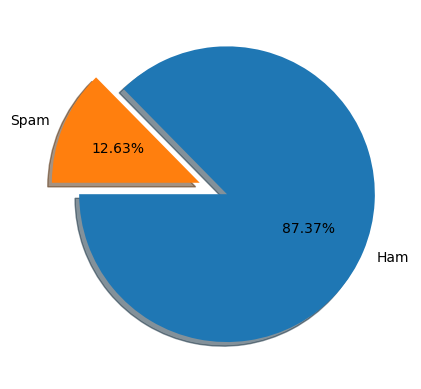

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts() , explode=(0,0.2),
    labels=['Ham' , 'Spam'],
    autopct='%1.2f%%',
    pctdistance=0.6,
    shadow=True,
    startangle=180,
    radius=1)
plt.show()

In [22]:
!pip install nltk
import nltk

In [23]:
nltk.download('punkt')

In [24]:
# No. of characters
df['num_characters'] = df['Sms-text'].apply(len)

In [25]:
# No. of words
df['num_words'] = df['Sms-text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [26]:
# No. of Sentences
df['num_sentences'] = df['Sms-text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,Target,Sms-text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
# for ham data
df[df['Target'] == 0][['num_words' , 'num_sentences' , 'num_characters']].describe()

,num_words,num_sentences,num_characters
count,4516.000000,4516.000000,4516.000000
mean,17.123782,1.820195,70.459256
std,13.493970,1.383657,56.358207
min,1.000000,1.000000,2.000000
25%,8.000000,1.000000,34.000000
50%,13.000000,1.000000,52.000000
75%,22.000000,2.000000,90.000000
max,220.000000,38.000000,910.000000


In [29]:
# for spam data
df[df['Target'] == 1][['num_words' , 'num_sentences' , 'num_characters']].describe()

,num_words,num_sentences,num_characters
count,653.000000,653.000000,653.000000
mean,27.667688,2.970904,137.891271
std,7.008418,1.488425,30.137753
min,2.000000,1.000000,13.000000
25%,25.000000,2.000000,132.000000
50%,29.000000,3.000000,149.000000
75%,32.000000,4.000000,157.000000
max,46.000000,9.000000,224.000000


<Axes: xlabel='num_characters', ylabel='Count'>

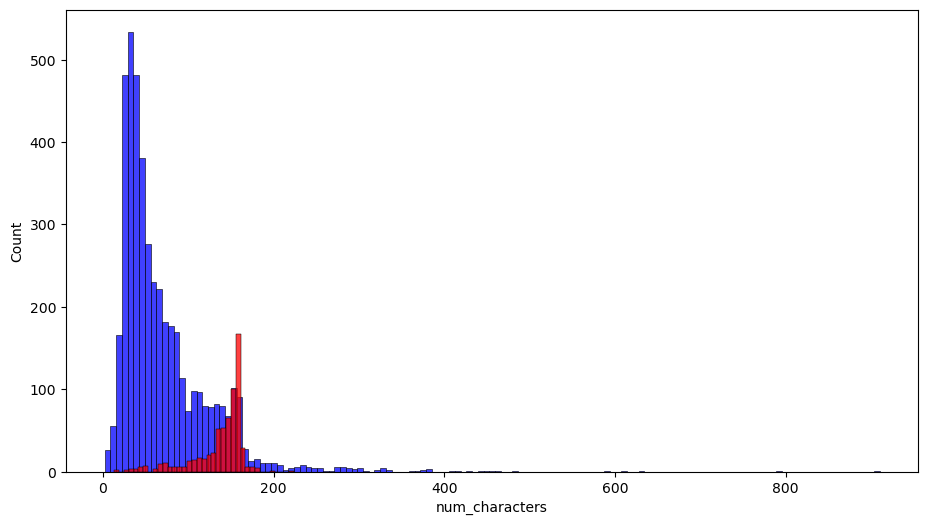

In [30]:
import seaborn as sns
plt.figure(figsize=(11,6))
sns.histplot(df[df['Target'] == 0]['num_characters'] , color='blue')
sns.histplot(df[df['Target'] == 1]['num_characters'] , color='red')

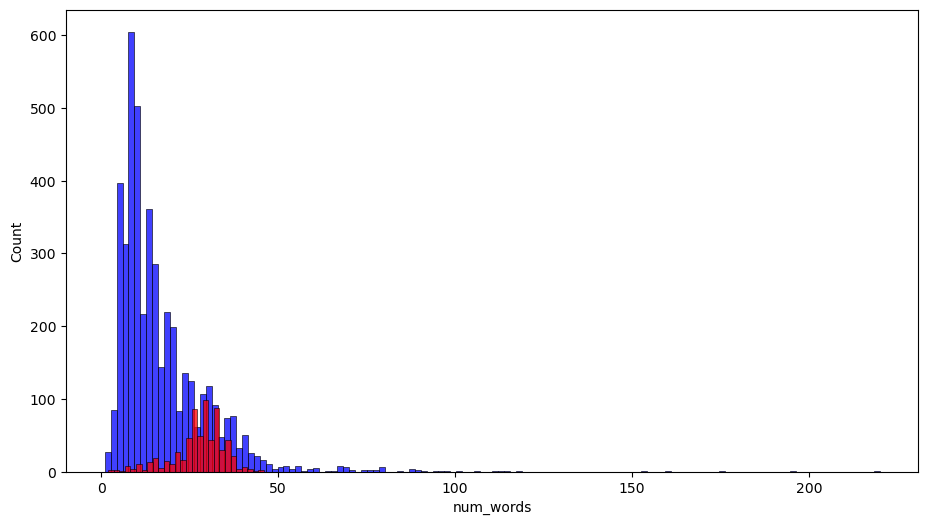

In [31]:
plt.figure(figsize=(11,6))
sns.histplot(df[df['Target'] == 0]['num_words'] , color='blue')
sns.histplot(df[df['Target'] == 1]['num_words'] , color='red')
plt.show()

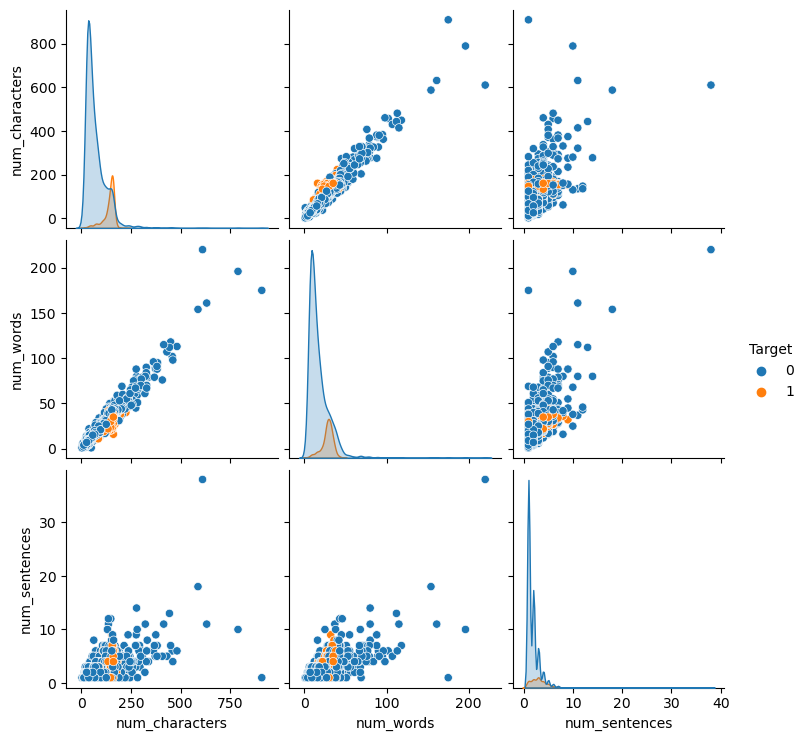

In [32]:
sns.pairplot(df , hue='Target')
plt.show()

In [33]:
df.corr(numeric_only=True)

,Target,num_characters,num_words,num_sentences
Target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

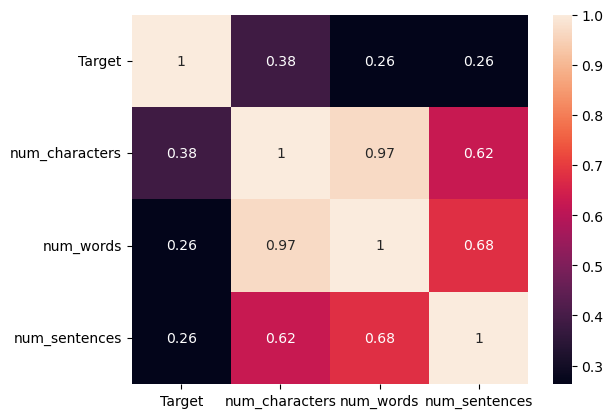

In [34]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

## Data Preprocessing

1. lowercase
2. Tokenization
3. Removal of special character
4. Removal of stopwords and punctuation
5. Stemming

In [35]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import string

In [36]:
def transform_text(text):
    
#   convert into lowercase
    text = text.lower()
    
#   convert sentence in list of words
    text = nltk.word_tokenize(text)
    
#   removal of special characters
    y = []
    for word in text:
        if word.isalnum():
            y.append(word)
    
    text = y.copy()
    y.clear()
    
#   removal of stopwords and punctuation
    for word in text:
        if word not in stopwords.words('english') and word not in string.punctuation:
            y.append(word)

    text = y.copy()
    y.clear()
    
#   Stemming
    for word in text:
        y.append(ps.stem(word))
        
    return " ".join(y)
    

In [37]:
df['transform_text'] = df['Sms-text'].apply(transform_text)

In [38]:
df.head()

,Target,Sms-text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [39]:
from wordcloud import WordCloud
wc1 = WordCloud(width=700, height=600, min_font_size=10 , background_color='black')
wc2 = WordCloud(width=700, height=600, min_font_size=10 , background_color='black')

In [40]:
spam_wc = wc1.generate(df[df['Target'] == 1]['transform_text'].str.cat(sep=" "))
ham_wc = wc2.generate(df[df['Target'] == 0]['transform_text'].str.cat(sep=" "))

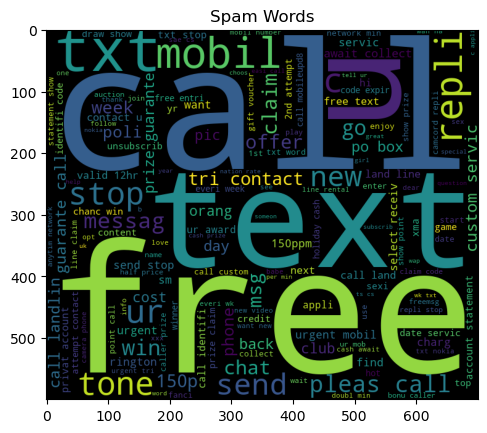

In [41]:
plt.imshow(spam_wc)
plt.title('Spam Words')
plt.show()

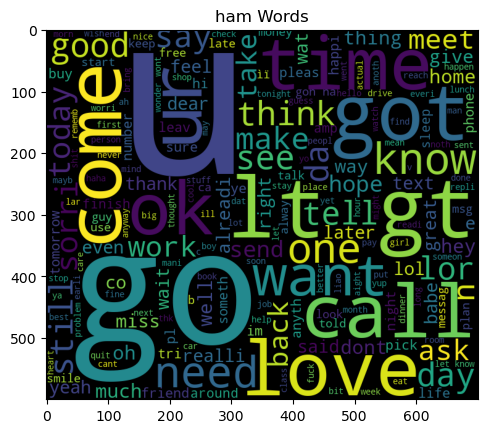

In [42]:
plt.imshow(ham_wc)
plt.title('ham Words')
plt.show()

In [43]:
spam_words = []
ham_words = []

for msg in df[df['Target'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_words.append(word)

for msg in df[df['Target'] == 0]['transform_text'].tolist():
    for word in msg.split():
        ham_words.append(word)

In [44]:
from collections import Counter

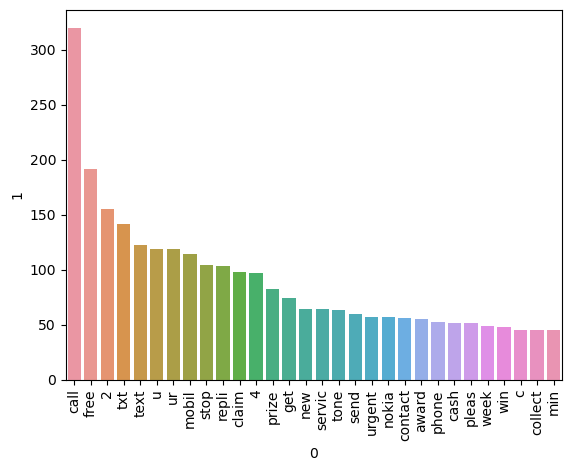

In [46]:
sns.barplot(x = pd.DataFrame(Counter(spam_words).most_common(30))[0] , y = pd.DataFrame(Counter(spam_words).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

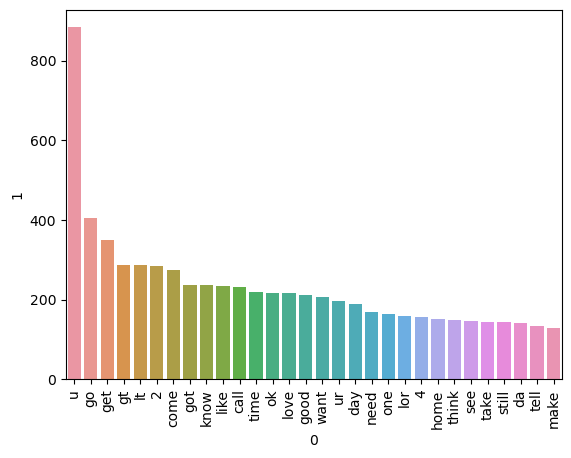

In [47]:
sns.barplot(x = pd.DataFrame(Counter(ham_words).most_common(30))[0] , y = pd.DataFrame(Counter(ham_words).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [48]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
# cv = CountVectorizer()
tfid = TfidfVectorizer(max_features=2000)

In [49]:
# x = cv.fit_transform(df['transform_text']).toarray() 
x = tfid.fit_transform(df['transform_text']).toarray()

In [50]:
y = df['Target'].values

In [51]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x , y , test_size=0.2,random_state=2)

In [52]:
from sklearn.naive_bayes import GaussianNB , BernoulliNB , MultinomialNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [53]:
g = GaussianNB()
b = BernoulliNB()
m = MultinomialNB()

In [54]:
g.fit(x_train , y_train)
y_predict_g  = g.predict(x_test)
print("accuracy_score : " + str(accuracy_score(y_test , y_predict_g)))
print("confusion_matrix : " + str(confusion_matrix(y_test , y_predict_g)))
print("precision_score : " + str(precision_score(y_test , y_predict_g)))

accuracy_score : 0.851063829787234
confusion_matrix : [[765 131]
 [ 23 115]]
precision_score : 0.46747967479674796


In [55]:
b.fit(x_train , y_train)
y_predict_b  = b.predict(x_test)
print("accuracy_score : " + str(accuracy_score(y_test , y_predict_b)))
print("confusion_matrix : " + str(confusion_matrix(y_test , y_predict_b)))
print("precision_score : " + str(precision_score(y_test , y_predict_b)))

accuracy_score : 0.9864603481624759
confusion_matrix : [[895   1]
 [ 13 125]]
precision_score : 0.9920634920634921


In [56]:
m.fit(x_train , y_train)
y_predict_m  = m.predict(x_test)
print("accuracy_score : " + str(accuracy_score(y_test , y_predict_m)))
print("confusion_matrix : " + str(confusion_matrix(y_test , y_predict_m)))
print("precision_score : " + str(precision_score(y_test , y_predict_m)))

accuracy_score : 0.97678916827853
confusion_matrix : [[896   0]
 [ 24 114]]
precision_score : 1.0


In [57]:
import pickle
pickle.dump(tfid , open('./streamlit/vectorizer.pkl' , 'wb'))
pickle.dump(m , open('./streamlit/model.pkl' , 'wb'))